# **Train_Data_Analysis**

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
train_activity = pd.read_csv('train_activity.csv')
train_sleep = pd.read_csv('train_sleep.csv')
train_mmse = pd.read_csv('train_mmse.csv')

In [3]:
training_label = pd.read_csv('training_label.csv')

In [4]:
train_activity.shape

(9705, 31)

In [5]:
train_sleep.shape

(9705, 36)

In [6]:
train_mmse.shape

(141, 38)

In [7]:
training_label.shape

(141, 2)

In [5]:
train_activity

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,nia+279@rowan.kr,1.28125,196,2251,...,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,...,78,100,100,54,100,97,4212,207,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
1,nia+279@rowan.kr,1.25000,145,2159,...,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,...,60,100,100,58,96,96,3306,140,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....
2,nia+279@rowan.kr,1.21875,118,2140,...,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,...,43,95,100,55,71,83,2550,131,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
3,nia+279@rowan.kr,1.28125,180,2240,...,2791,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,0,705,...,43,100,100,58,71,59,4009,208,1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
4,nia+279@rowan.kr,1.46875,374,2559,...,5393,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,0,437,...,43,100,100,89,40,46,8081,517,1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,1.34375,249,2351,...,4411,2020-12-25T03:59:59+09:00,2020-12-24T04:00:00+09:00,1,780,...,25,43,100,45,40,95,4972,190,1/1/1/1/1/1/1/1/1/1/2/3/2/2/2/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
9701,nia+206@rowan.kr,1.53125,570,2682,...,11057,2020-12-27T03:59:59+09:00,2020-12-26T04:00:00+09:00,1,518,...,43,95,100,76,71,93,11878,394,1/1/1/1/1/1/2/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/1.1/0.9/0.9/1.1/0.9/0.9/0.9/0....
9702,nia+206@rowan.kr,1.34375,295,2331,...,5135,2020-12-28T03:59:59+09:00,2020-12-27T04:00:00+09:00,4,578,...,25,100,100,70,40,95,5752,207,1/1/1/2/3/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...,1.1/0.9/0.9/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
9703,nia+206@rowan.kr,1.31250,186,2280,...,3178,2020-12-29T03:59:59+09:00,2020-12-28T04:00:00+09:00,0,778,...,25,95,100,47,40,93,3852,156,1/1/1/1/1/1/1/1/1/1/1/1/2/2/0/0/0/0/0/0/0/0/0/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


In [6]:
train_sleep.shape

(9705, 36)

In [7]:
train_sleep

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,65,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,65,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/...,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/...,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/...
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,41,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55...,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/...,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53...
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,81,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51...,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/...,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50...
4,nia+279@rowan.kr,7170,2020-10-23T02:23:30+09:00,2020-10-22T20:38:30+09:00,17.875,4320,20700,65,...,50.80,...,39,78,25,29,-0.50,-0.50,13530,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/5...,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/...,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,2020-12-24T06:51:37+09:00,2020-12-23T21:35:37+09:00,15.875,1710,33360,82,...,63.75,...,76,81,95,86,-0.09,-0.09,27360,68/66/67/67/68/69/69/70/71/71/71/69/72/70/70/7...,4/4/2/2/2/1/1/1/1/1/1/2/2/3/3/2/2/2/2/2/3/4/2/...,26/16/19/18/16/18/19/17/15/16/15/13/11/13/13/1...
9701,nia+206@rowan.kr,5700,2020-12-26T06:36:19+09:00,2020-12-25T22:54:19+09:00,16.125,0,27720,79,...,67.40,...,69,86,89,64,0.41,0.41,22020,0/0/65/65/66/67/69/72/73/72/73/74/73/74/75/75/...,4/4/2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/3/3/3/2/2/4/...,0/0/13/12/12/13/12/12/12/16/13/12/13/17/13/18/...
9702,nia+206@rowan.kr,5070,2020-12-27T07:56:40+09:00,2020-12-26T22:05:40+09:00,15.625,480,35460,86,...,64.84,...,86,89,98,97,0.27,0.27,30390,0/0/0/64/64/64/64/65/65/66/66/66/66/68/68/68/6...,4/4/4/4/2/2/2/2/2/2/2/2/2/3/3/3/3/2/4/4/2/2/2/...,0/0/0/14/17/18/14/14/17/15/17/12/17/12/13/12/1...
9703,nia+206@rowan.kr,2040,2020-12-28T05:05:45+09:00,2020-12-27T21:21:45+09:00,15.875,2220,27840,93,...,67.05,...,98,89,86,80,-0.05,-0.05,25800,0/60/60/61/60/60/60/62/64/64/64/64/65/68/70/70...,4/4/1/2/2/2/2/1/2/2/2/1/1/1/3/3/1/1/2/2/3/3/3/...,0/14/15/14/15/16/17/16/16/18/18/20/23/15/21/20...


In [8]:
train_mmse.shape

(141, 38)

In [9]:
train_mmse

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+315@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,29
1,nia+014@rowan.kr,3,MCI,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28
2,nia+220@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+096@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
4,nia+396@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+181@rowan.kr,1,CN,-,1,2,2,2,2,1,...,2,2,2,2,2,1,2,2,2,26
137,nia+354@rowan.kr,2,CN,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,26
138,nia+448@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
139,nia+394@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28


In [10]:
training_label.shape

(141, 2)

In [11]:
train_activity['EMAIL'].value_counts()

EMAIL
nia+068@rowan.kr    120
nia+265@rowan.kr    118
nia+039@rowan.kr    115
nia+059@rowan.kr    113
nia+005@rowan.kr    113
                   ... 
nia+403@rowan.kr     37
nia+394@rowan.kr     36
nia+445@rowan.kr     36
nia+398@rowan.kr     36
nia+015@rowan.kr     35
Name: count, Length: 141, dtype: int64

In [12]:
train_sleep['EMAIL'].value_counts()

EMAIL
nia+068@rowan.kr    120
nia+265@rowan.kr    118
nia+039@rowan.kr    115
nia+059@rowan.kr    113
nia+005@rowan.kr    113
                   ... 
nia+403@rowan.kr     37
nia+394@rowan.kr     36
nia+445@rowan.kr     36
nia+398@rowan.kr     36
nia+015@rowan.kr     35
Name: count, Length: 141, dtype: int64

In [13]:
train_mmse['SAMPLE_EMAIL'].value_counts()

SAMPLE_EMAIL
nia+315@rowan.kr    1
nia+010@rowan.kr    1
nia+342@rowan.kr    1
nia+137@rowan.kr    1
nia+005@rowan.kr    1
                   ..
nia+331@rowan.kr    1
nia+039@rowan.kr    1
nia+252@rowan.kr    1
nia+032@rowan.kr    1
nia+067@rowan.kr    1
Name: count, Length: 141, dtype: int64

141명에 대한 데이터를 수집했음. 각 사람은 암호화된 이메일로 구분할 수 있음

In [14]:
training_label['DIAG_NM'].value_counts()

DIAG_NM
CN     85
MCI    47
Dem     9
Name: count, dtype: int64

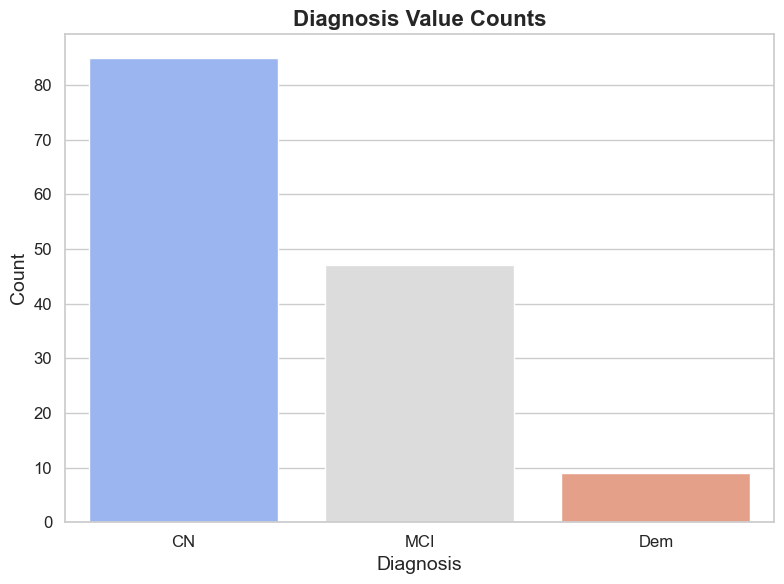

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터
labels = ['CN', 'MCI', 'Dem']
values = [85, 47, 9]

# 스타일 설정
sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", len(values))

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette=palette)

# 그래프 세부 설정
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diagnosis Value Counts', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

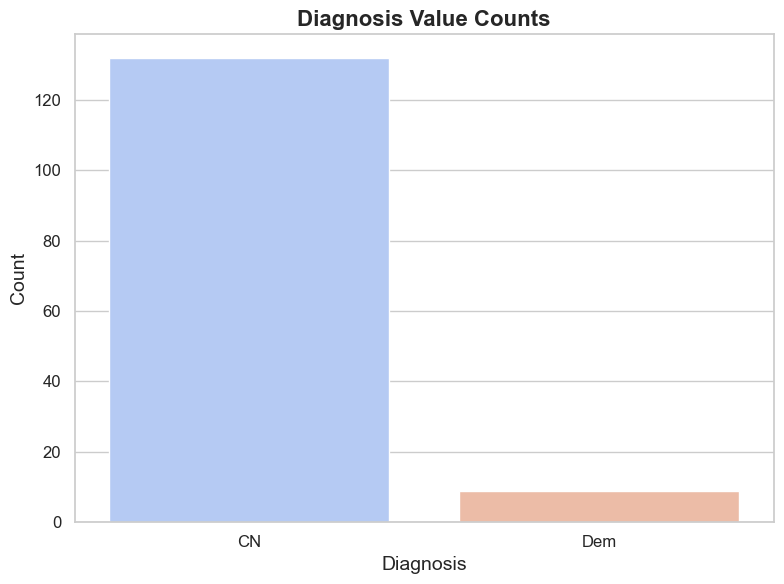

In [9]:
# 데이터
labels = ['CN', 'Dem']
values = [132, 9]

# 스타일 설정
sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", len(values))

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette=palette)

# 그래프 세부 설정
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diagnosis Value Counts', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

**CN : 정상인, MCI : 경도인지 장애 환자, Dem : 치매환자** 

## **train_activity**

activity_average_met - 하루간 평균 MET (MET 값이 높을수록 활동 강도가 높다고 볼 수 있다)  
activity_cal_active - 하루간 활동 칼로리  
activity_cal_total - 하루간 총 사용 칼로리  
activity_class_5min - 하루간 5분당 활동 로그  
activity_daily_movement - 매일 움직인 거리  
activity_day_end - 활동 종료 시간  
activity_day_start - 활동 시작 시간  
activity_high - 고강도 활동 시간  
activity_inactive - 비활동 시간  
activity_inactivity_alerts - 비활동 알람 횟수  
activity_low - 저강도 활동 시간  
activity_medium - 중강도 활동 시간  
activity_met_1min - 하루간 1분 당 MET 로그  
activity_met_min_high - 하루간 고강도 활동 MET  
activity_met_min_inactive - 하루간 비활동 MET  
activity_met_min_low - 하루간 저강도 활동 MET  
activity_met_min_medium - 하루간 중강도 활동 MET  
activity_non_wear - 미착용 시간  
activity_rest - 휴식 시간  
activity_score - 활동 점수  
activity_score_meet_daily_targets - 활동 목표달성 점수  
activity_score_move_every_hour - 매 시간 당 활동유지 점수  
activity_score_recovery_time - 회복시간 점수  
activity_score_stay_active - 활동 유지 점수  
activity_score_training_frequency - 운동 빈도 점수  
activity_score_training_volume - 운동 빈도 점수  
activity_steps - 매일 걸음 수  
activity_total - 활동 총 시간(분)  
CONVERT(activity_class_5min USING utf8) - 하루간 5분당 활동 로그 (UTF-8 변환)  
CONVERT(activity_met_1min USING utf8) - 하루간 1분 당 MET 로그 (UTF-8 변환)  

In [15]:
train_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EMAIL                                    9705 non-null   object 
 1   activity_average_met                     9705 non-null   float64
 2   activity_cal_active                      9705 non-null   int64  
 3   activity_cal_total                       9705 non-null   int64  
 4   activity_class_5min                      9705 non-null   object 
 5   activity_daily_movement                  9705 non-null   int64  
 6   activity_day_end                         9705 non-null   object 
 7   activity_day_start                       9705 non-null   object 
 8   activity_high                            9705 non-null   int64  
 9   activity_inactive                        9705 non-null   int64  
 10  activity_inactivity_alerts               9705 no

NULL값은 없음

<Axes: >

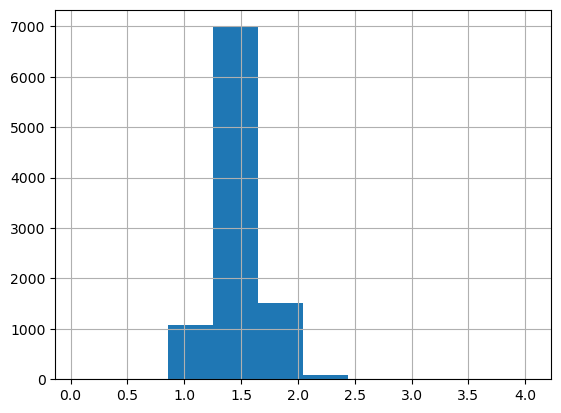

In [16]:
train_activity['activity_average_met'].hist()

In [17]:
train_activity['activity_average_met'].describe()

count    9705.000000
mean        1.470814
std         0.193798
min         0.062500
25%         1.343750
50%         1.437500
75%         1.593750
max         4.031250
Name: activity_average_met, dtype: float64

<Axes: >

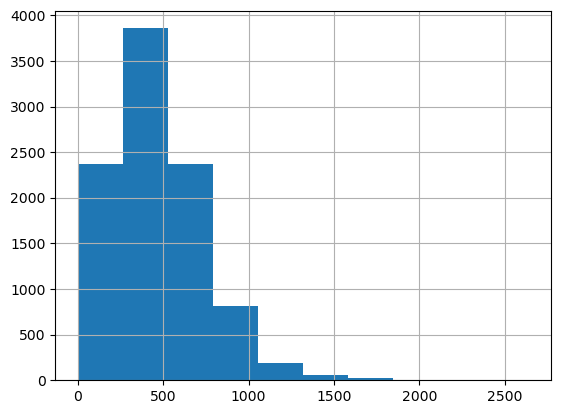

In [18]:
train_activity['activity_cal_active'].hist()

In [19]:
train_activity['activity_cal_active'].describe()

count    9705.000000
mean      468.230500
std       271.203042
min         0.000000
25%       267.000000
50%       425.000000
75%       616.000000
max      2640.000000
Name: activity_cal_active, dtype: float64

침대에만 계신 분들도 있으신듯

<Axes: >

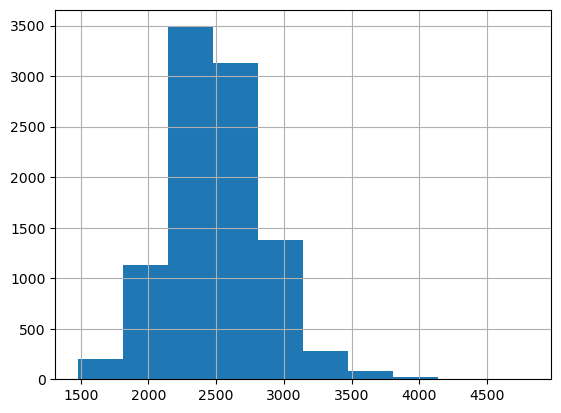

In [20]:
train_activity['activity_cal_total'].hist()

In [21]:
train_activity['activity_cal_total'].describe()

count    9705.000000
mean     2505.469552
std       356.893669
min      1478.000000
25%      2273.000000
50%      2479.000000
75%      2720.000000
max      4808.000000
Name: activity_cal_total, dtype: float64

min이 0은 아닌것으로 봐서 데이터에 이상치는 없어보인다.

In [22]:
train_activity['activity_class_5min']

0       ...
1       ...
2       ...
3       ...
4       ...
       ... 
9700    ...
9701    ...
9702    ...
9703    ...
9704    ...
Name: activity_class_5min, Length: 9705, dtype: object

... 밖에 없어서 drop 해야할 듯

<Axes: >

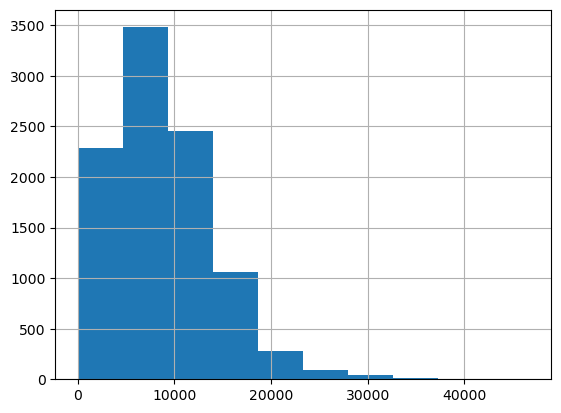

In [23]:
train_activity['activity_daily_movement'].hist()

In [24]:
train_activity['activity_daily_movement'].describe()

count     9705.000000
mean      8844.447295
std       5345.391611
min          0.000000
25%       4868.000000
50%       8049.000000
75%      11815.000000
max      46659.000000
Name: activity_daily_movement, dtype: float64

activity_day는 그다지 쓰일일이 없을 듯? (수면시간은 sleep쪽에 있기 때문에)

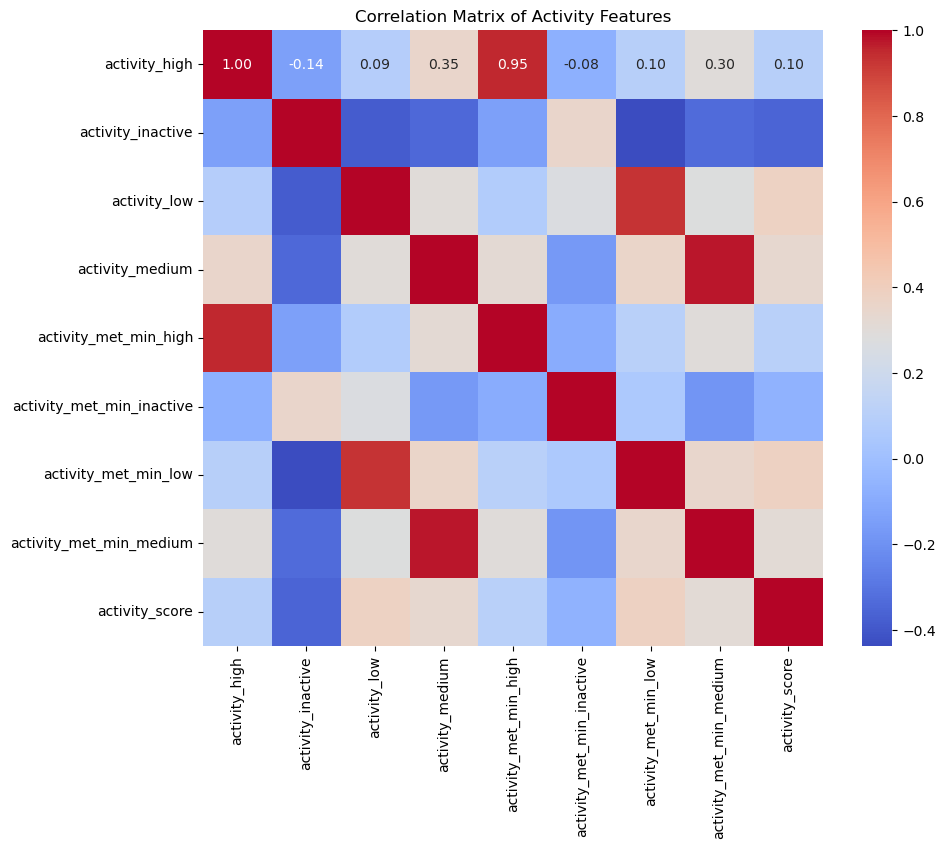

In [25]:
# 상관관계를 확인할 피처 리스트
features = [
    'activity_high', 'activity_inactive', 'activity_low', 'activity_medium',
    'activity_met_min_high', 'activity_met_min_inactive', 'activity_met_min_low', 'activity_met_min_medium', 'activity_score'
]

# 피처들 간의 상관관계 계산
correlation_matrix = train_activity[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Activity Features")
plt.show()

MET와 시간 피쳐는 2개중에 하나만 사용해도 무방할 것으로 보임

<Axes: >

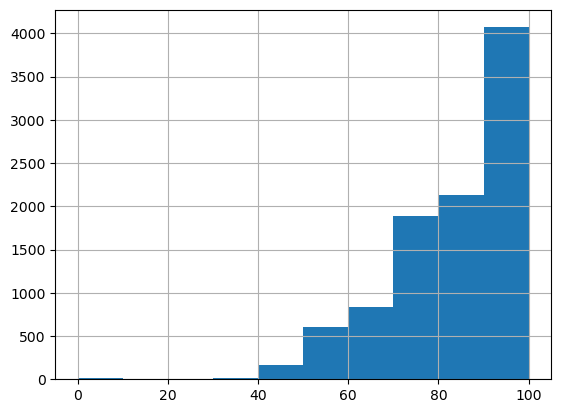

In [26]:
train_activity['activity_score'].hist()

In [27]:
train_activity['activity_score'].describe()

count    9705.000000
mean       82.774343
std        13.904996
min         0.000000
25%        74.000000
50%        86.000000
75%        94.000000
max       100.000000
Name: activity_score, dtype: float64

activity_score를 살펴보는데 점수가 0인경우가 있다.

In [28]:
train_activity[train_activity['activity_score'] == 0]['EMAIL']

7728    nia+376@rowan.kr
7729    nia+376@rowan.kr
7730    nia+376@rowan.kr
7731    nia+376@rowan.kr
7732    nia+376@rowan.kr
7733    nia+376@rowan.kr
7734    nia+376@rowan.kr
7735    nia+376@rowan.kr
7736    nia+376@rowan.kr
Name: EMAIL, dtype: object

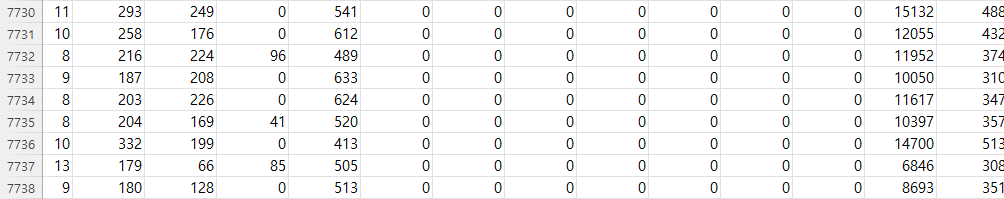

score가 0인 경우는 센서오류로 판단하여 제거해도 무방할 것 같다.

In [29]:
train_activity['activity_steps'].describe()

count     9705.000000
mean     10735.967233
std       5886.621344
min         41.000000
25%       6304.000000
50%       9962.000000
75%      14282.000000
max      44836.000000
Name: activity_steps, dtype: float64

<Axes: >

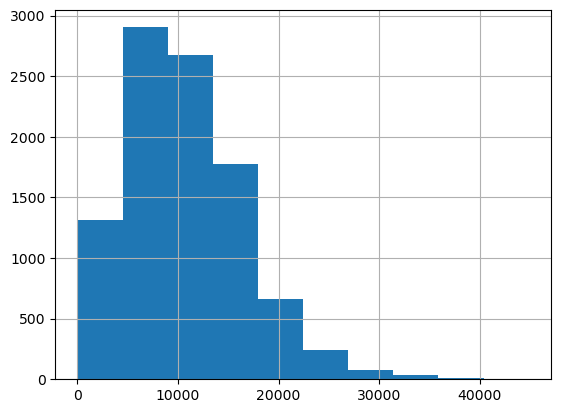

In [30]:
train_activity['activity_steps'].hist()

In [31]:
int64_features = train_activity.select_dtypes(include=['int64', 'float64'])
correlation_matrix = int64_features.corr()

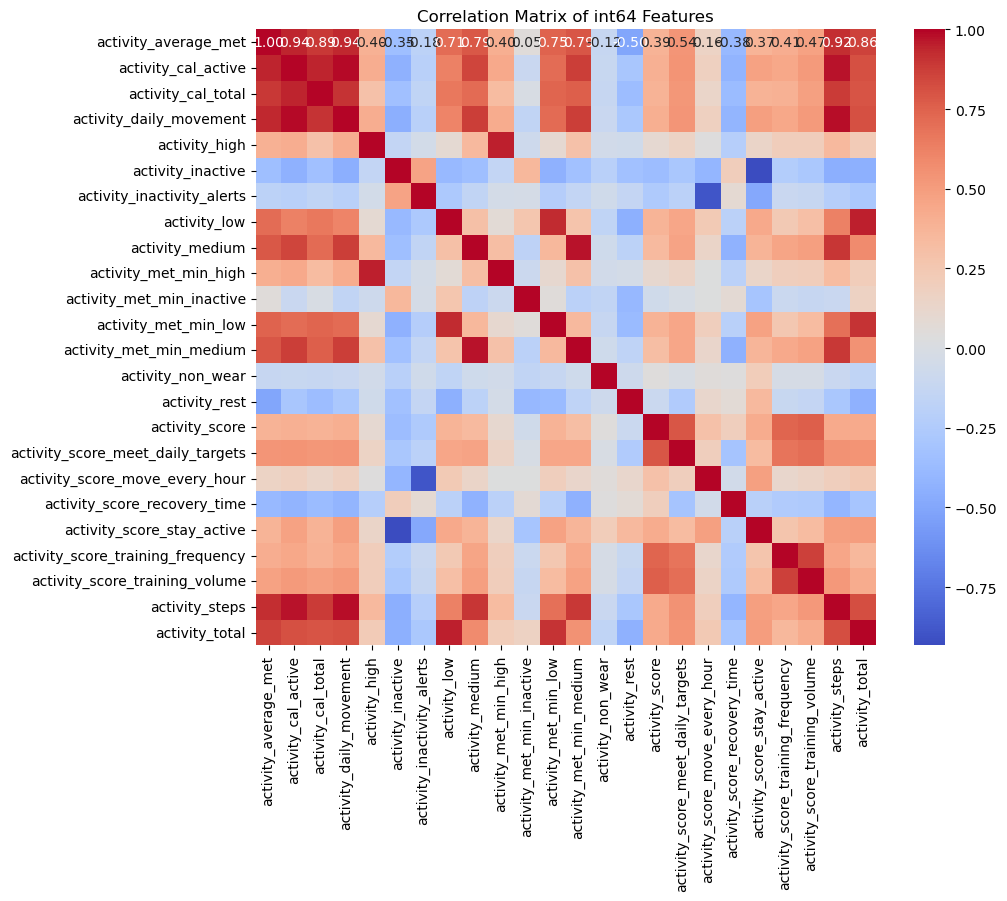

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of int64 Features")
plt.show()

- activity_cal_active와 activity_cal_total은 높은 상관관계,  
  활동으로 인한 칼로리 소비가 전체 칼로리 소비와 밀접하게 관련되어있음  

- activity_inactive와 activity_cal_active는 음의 상관관계.  
  비활동 시간이 증가할수록 활동으로 인한 칼로리 소비는 감소하는 경향이 있음  

- activity_non_wear와 여러 활동 관련 변수(activity_high, activity_met_min_high)는 음의 상관관계.
  착용하지 않는 시간이 많아지면 활동 지표가 낮아짐

## **train_sleep**

**sleep_awake - 깬 시간**  
**sleep_bedtime_end - 잠 종료시간**    
**sleep_bedtime_start - 잠 시작시간**   
**sleep_breath_average - 분당 평균 호흡 수**  
**sleep_deep - 깊은 수면 시간**  
**sleep_duration - 잠 시간**  
**sleep_efficiency - 수면 효율**  
**sleep_hr_5min - 5분 당 심박동 로그**  
**sleep_hr_average - 분당 평균 심박동 수**  
**sleep_hr_lowest - 분당 낮은 심박동 수**  
**sleep_hypnogram_5min - 수면 상태 로그**  
**sleep_is_longest - 본 수면 여부**  
**sleep_light - 가벼운 수면 시간**  
**sleep_midpoint_at_delta - 수면 중간점 시간 델타**  
**sleep_midpoint_time - 수면 중간점 시간**  
**sleep_onset_latency - 수면 잠복 시간**  
**sleep_period_id - 수면 식별 아이디**  
**sleep_rem - 램수면 시간**  
**sleep_restless - 뒤척임 비율**  
**sleep_rmssd - 평균 심박동변동**  
**sleep_rmssd_5min - 5분 당 심박동변동 로그**  
**sleep_score - 수면 종합 점수**  
**sleep_score_alignment - 수면 시기 점수**  
**sleep_score_deep - 깊은 수면 점수**  
**sleep_score_disturbances - 수면 방해 점수**  
**sleep_score_efficiency - 수면 효율 점수**  
**sleep_score_latency - 수면 잠복 점수**  <잠자리에 들어서 실제로 잠들기까지 걸리는 시간>  
**sleep_score_rem - 램수면 점수**  
**sleep_score_total - 수면 시간 기여 점수**  
**sleep_temperature_delta - 피부 온도 편차**  
**sleep_temperature_deviation - 피부 온도 편차 (중복된 설명 항목)**  
**sleep_total - 수면 시간**  
**CONVERT(sleep_hr_5min USING utf8) - 5분 당 심박동 로그 (utf8 변환)**  
**CONVERT(sleep_hypnogram_5min USING utf8) - 수면 상태 로그 (utf8 변환)**  
**CONVERT(sleep_rmssd_5min USING utf8) - 5분 당 심박동변동 로그 (utf8 변환)**

In [33]:
train_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9705 non-null   object 
 1   sleep_awake                               9705 non-null   int64  
 2   sleep_bedtime_end                         9705 non-null   object 
 3   sleep_bedtime_start                       9705 non-null   object 
 4   sleep_breath_average                      9705 non-null   float64
 5   sleep_deep                                9705 non-null   int64  
 6   sleep_duration                            9705 non-null   int64  
 7   sleep_efficiency                          9705 non-null   int64  
 8   sleep_hr_5min                             9705 non-null   object 
 9   sleep_hr_average                          9705 non-null   float64
 10  sleep_hr_lowest                     

NULL 없음

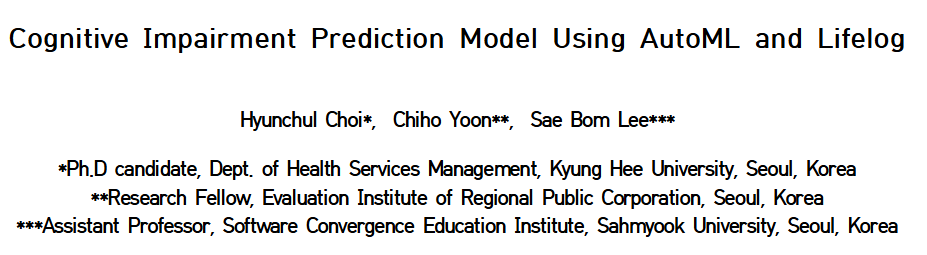  
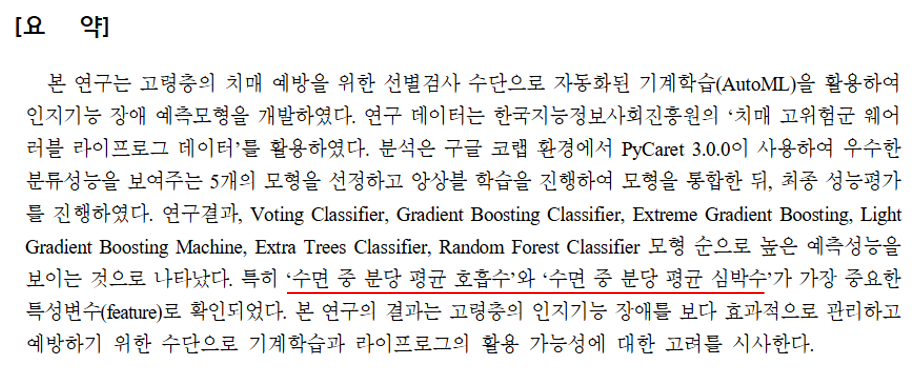

<Axes: >

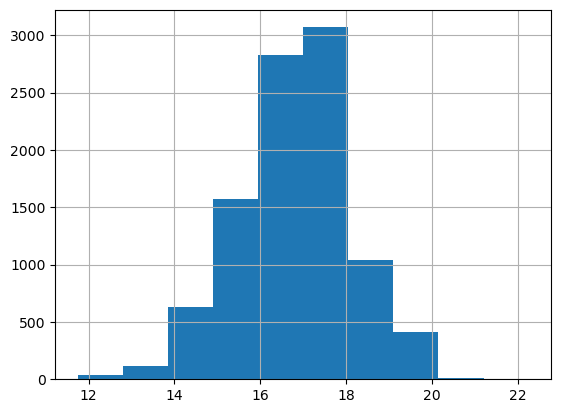

In [34]:
train_sleep['sleep_breath_average'].hist()

In [35]:
train_sleep['sleep_breath_average'].describe()

count    9705.000000
mean       16.791589
std         1.294707
min        11.750000
25%        16.000000
50%        16.875000
75%        17.625000
max        22.250000
Name: sleep_breath_average, dtype: float64

<Axes: >

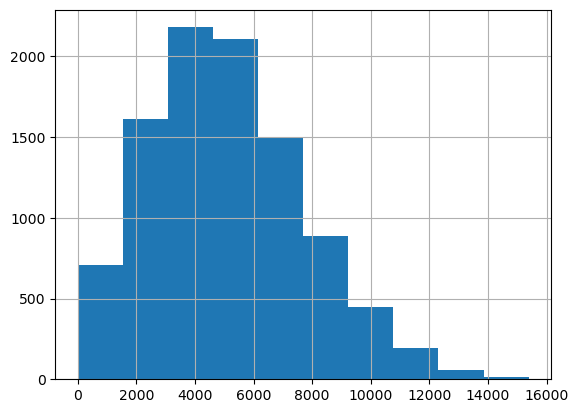

In [36]:
train_sleep['sleep_deep'].hist()

In [37]:
train_sleep['sleep_deep'].describe()

count     9705.000000
mean      5104.166924
std       2621.211223
min          0.000000
25%       3150.000000
50%       4890.000000
75%       6720.000000
max      15390.000000
Name: sleep_deep, dtype: float64

<Axes: >

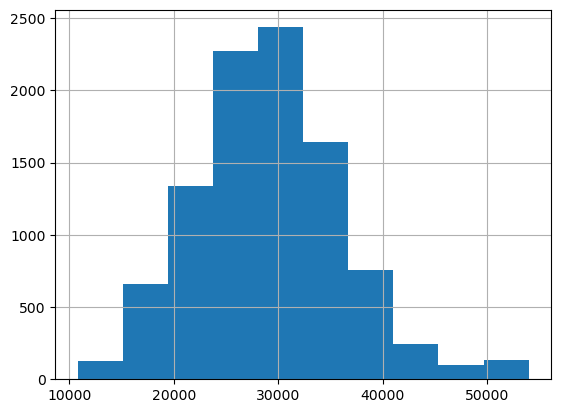

In [38]:
train_sleep['sleep_duration'].hist()

In [39]:
train_sleep['sleep_duration'].describe()

count     9705.000000
mean     29113.706337
std       7097.636640
min      10800.000000
25%      24360.000000
50%      28800.000000
75%      33360.000000
max      54000.000000
Name: sleep_duration, dtype: float64

최소 수면시간이 10800초인데 깊은 수면이 0초인 경우가 있음

In [40]:
not_deep_sleep_index = train_sleep[train_sleep['sleep_deep'] == 0]

In [41]:
train_sleep[train_sleep['sleep_deep'] == 0]

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
994,nia+144@rowan.kr,780,2020-11-24T06:37:09+09:00,2020-11-24T02:38:09+09:00,18.125,0,14340,95,...,63.04,...,100,78,52,29,-0.15,-0.15,13560,62/65/63/63/62/63/64/67/69/75/73/73/71/69/68/6...,4/2/2/2/2/2/2/3/3/3/3/3/3/3/3/3/2/2/2/2/2/2/2/...,18/9/14/13/14/15/14/13/11/9/9/10/9/10/10/12/13...
5299,nia+353@rowan.kr,4650,2020-11-18T01:40:29+09:00,2020-11-17T21:03:29+09:00,15.125,0,16620,72,...,64.27,...,53,86,21,24,0.09,0.09,11970,67/64/59/58/58/58/0/61/60/60/60/62/0/67/67/67/...,4/2/2/2/2/2/2/2/2/2/2/2/2/2/2/3/2/2/2/2/2/4/4/...,19/18/55/68/90/96/0/78/92/87/108/87/0/24/22/30...
8096,nia+306@rowan.kr,5550,2020-12-27T06:55:00+09:00,2020-12-26T21:04:00+09:00,16.250,0,35460,84,...,59.27,...,83,72,80,96,0.19,0.19,29910,56/54/0/56/56/56/57/58/58/59/59/58/58/59/58/59...,4/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/2/...,49/40/0/32/26/40/25/25/28/30/36/32/21/22/21/24...
9488,nia+234@rowan.kr,3510,2020-11-20T04:56:06+09:00,2020-11-20T00:40:06+09:00,14.250,0,15360,77,...,38.94,...,65,35,1,24,-1.26,-1.26,11850,0/40/41/0/0/0/0/40/40/40/41/41/0/0/0/38/0/0/0/...,4/2/4/4/4/4/4/4/2/2/2/2/2/2/4/2/2/4/4/2/2/2/2/...,0/95/75/0/0/0/0/77/86/61/66/58/0/0/0/110/0/0/0...
9701,nia+206@rowan.kr,5700,2020-12-26T06:36:19+09:00,2020-12-25T22:54:19+09:00,16.125,0,27720,79,...,67.40,...,69,86,89,64,0.41,0.41,22020,0/0/65/65/66/67/69/72/73/72/73/74/73/74/75/75/...,4/4/2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/3/3/3/2/2/4/...,0/0/13/12/12/13/12/12/12/16/13/12/13/17/13/18/...


<Axes: >

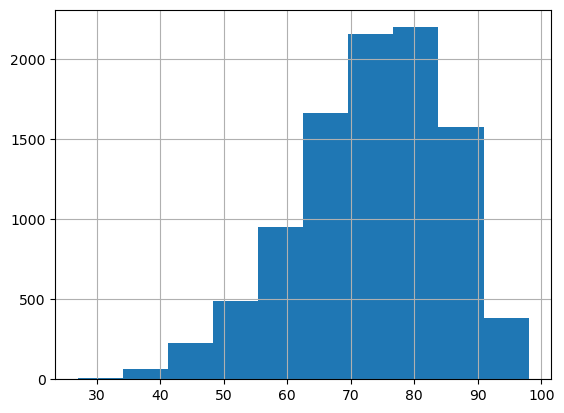

In [45]:
train_sleep['sleep_score'].hist()

In [46]:
train_sleep['sleep_score'].describe()

count    9705.000000
mean       73.155178
std        11.595495
min        27.000000
25%        66.000000
50%        74.000000
75%        82.000000
max        98.000000
Name: sleep_score, dtype: float64

<Axes: >

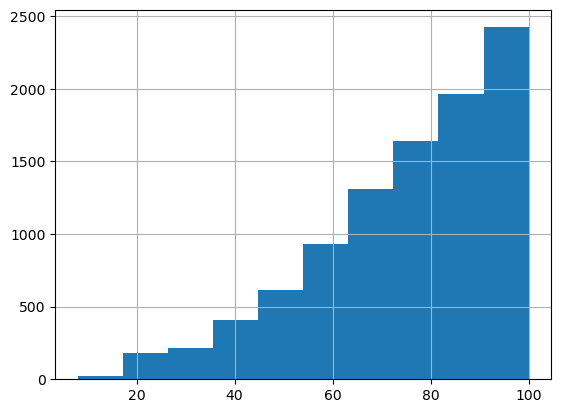

In [47]:
train_sleep['sleep_score_efficiency'].hist()

In [48]:
train_sleep['sleep_score_efficiency'].describe()

count    9705.000000
mean       75.595363
std        19.236530
min         8.000000
25%        65.000000
50%        79.000000
75%        90.000000
max       100.000000
Name: sleep_score_efficiency, dtype: float64

In [49]:
number_features_sleep = train_sleep.select_dtypes(include=['int64', 'float64'])
correlation_matrix = number_features_sleep.corr()

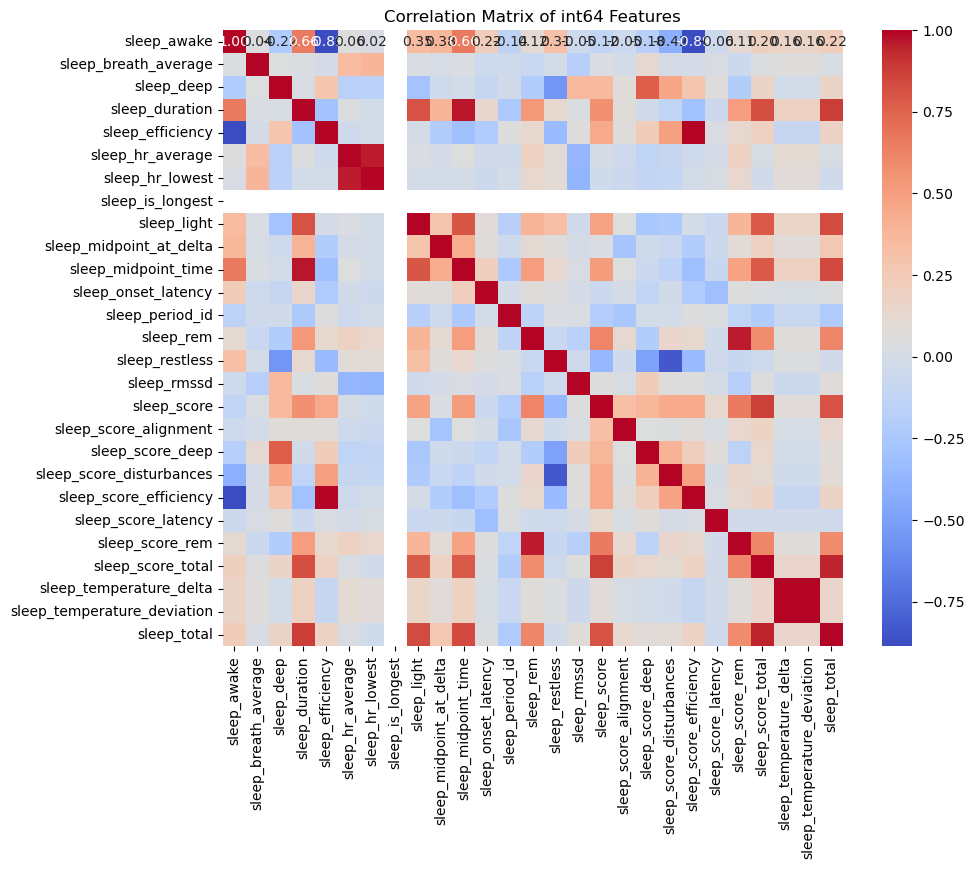

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of int64 Features")
plt.show()

sleep_duration, sleep_total 강한 양의 상관관계, 수면 시간의 총합이 수면 기간과 밀접하게 연관되어 있음  

sleep_score_total, sleep_duration, sleep_total 수면 시간이 길수록 수면 점수가 높게 나온다.  

sleep_score_efficiency, sleep_efficiency 수면 효율 점수와 실제 수면 효율 간에 강한 양의 상관관계

온도 편차 변수는 수면 점수와 직접적인 상관이 크지 않음

sleep_onset_latency, sleep_score_latency 잠들기까지 걸리는 시간이 길어질수록 수면 잠복 점수는 낮아진다  

sleep_restless, sleep_efficiency: 뒤척임이 많을수록 수면 효율이 떨어지는 음의 상관관계가 나타난다.

## **train_mmse**

MMSE_KIND는 2로 동일함, TOTAL만 사용하면 괜찮을 것 같음

<Axes: >

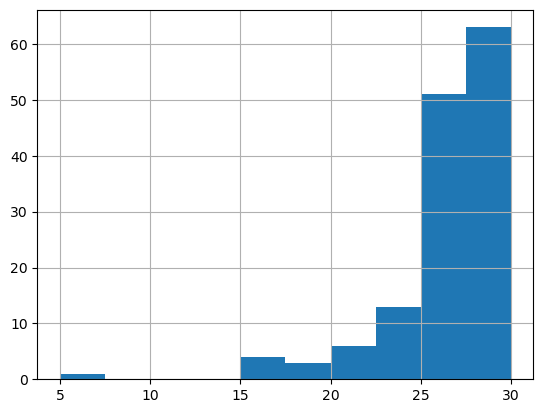

In [51]:
train_mmse['TOTAL'].hist()

In [52]:
train_mmse['TOTAL'].describe()

count    141.000000
mean      26.375887
std        3.520428
min        5.000000
25%       25.000000
50%       27.000000
75%       28.000000
max       30.000000
Name: TOTAL, dtype: float64

In [53]:
train_mmse.groupby('DIAG_NM')['TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
DIAG_NM,,,,,,,,
CN,85.0,27.588235,1.866332,20.0,27.0,28.0,29.0,30.0
Dem,9.0,19.222222,6.495725,5.0,16.0,22.0,23.0,27.0
MCI,47.0,25.553191,3.255821,17.0,24.0,26.0,28.0,29.0


치매라면 TOTAL 점수가 확연히 낮다. 그러나, MAX TOTAL은 27로 확실하게 이걸로 구분하는 것은 어렵다. 

In [54]:
from scipy.stats import f_oneway

cn_total = train_mmse[train_mmse['DIAG_NM'] == 'CN']['TOTAL']
mci_total = train_mmse[train_mmse['DIAG_NM'] == 'MCI']['TOTAL']
dem_total = train_mmse[train_mmse['DIAG_NM'] == 'Dem']['TOTAL']

f_stat, p_value = f_oneway(cn_total, mci_total, dem_total)
print(f"ANOVA Test: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA Test: F-statistic = 38.10733609544282, p-value = 6.653669458052188e-14


P-value가 6.653669458052188e-14로 작아서 그룹 간 TOTAL 점수의 차이가 통계적으로 유의미하다고 결론 지을 수 있다

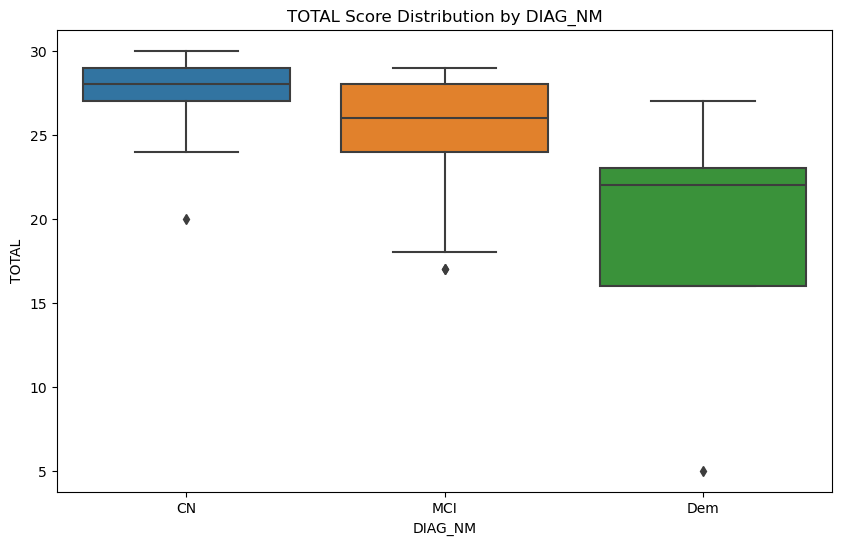

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_mmse, x='DIAG_NM', y='TOTAL')
plt.title("TOTAL Score Distribution by DIAG_NM")
plt.show()

In [56]:
train_mmse = pd.get_dummies(train_mmse, columns=['DIAG_NM'], prefix='DIAG')

In [57]:
train_mmse

,SAMPLE_EMAIL,DIAG_SEQ,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,Q05,...,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL,DIAG_CN,DIAG_Dem,DIAG_MCI
0,nia+315@rowan.kr,2,-,2,2,2,2,2,2,2,...,1,2,2,2,2,2,29,True,False,False
1,nia+014@rowan.kr,3,-,3,2,2,2,2,2,2,...,1,2,2,2,2,2,28,False,False,True
2,nia+220@rowan.kr,2,-,2,2,2,2,2,2,2,...,2,2,2,2,2,2,30,True,False,False
3,nia+096@rowan.kr,2,-,2,2,2,2,2,2,2,...,2,2,2,2,2,2,27,False,False,True
4,nia+396@rowan.kr,3,-,3,2,2,2,2,2,2,...,2,2,2,2,2,2,30,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,nia+181@rowan.kr,1,-,1,2,2,2,2,1,2,...,2,2,1,2,2,2,26,True,False,False
137,nia+354@rowan.kr,2,-,2,2,2,2,2,2,2,...,2,2,2,2,2,2,26,True,False,False
138,nia+448@rowan.kr,2,-,2,2,2,2,2,2,2,...,2,2,2,2,2,2,28,False,False,True
139,nia+394@rowan.kr,3,-,3,2,2,2,2,2,2,...,2,2,2,2,2,2,28,True,False,False


DIAG_NM을 원 핫 인코딩

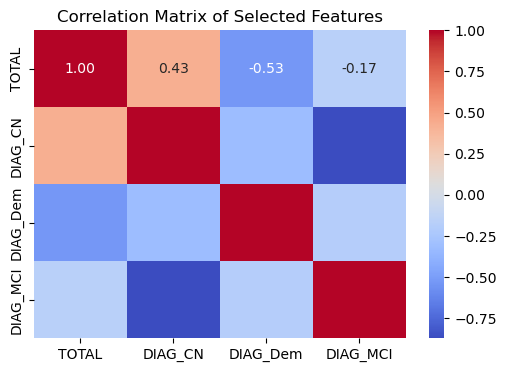

In [58]:
# 필요한 피처들만 선택
selected_features = train_mmse[['TOTAL', 'DIAG_CN', 'DIAG_Dem', 'DIAG_MCI']]

# 상관 행렬 계산
correlation_matrix = selected_features.corr()

# 상관 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

TOTAL 점수가 CN(정상) 상태일 때는 높고, Dem(치매) 상태일 때는 낮아지는 경향이 있음

## **종합**

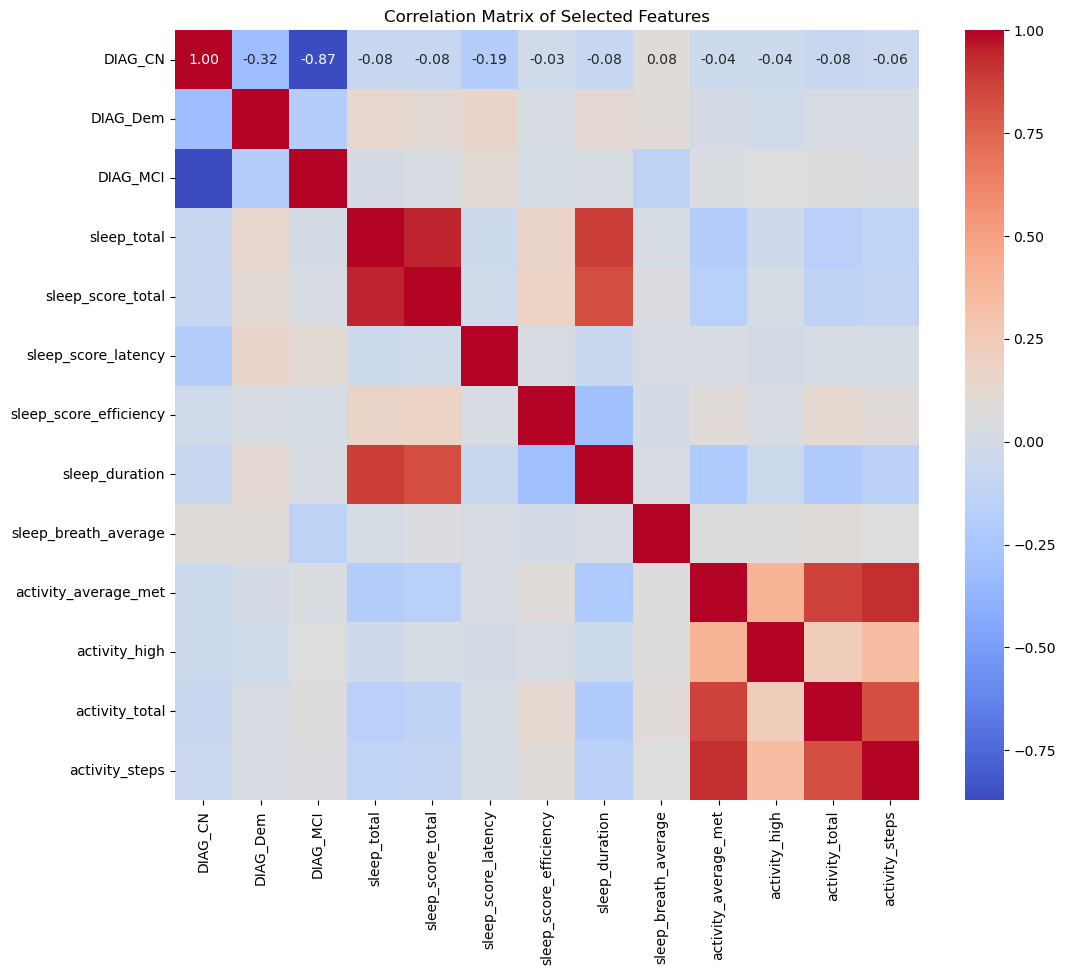

In [59]:
selected_columns = pd.concat([
    train_mmse[['DIAG_CN', 'DIAG_Dem', 'DIAG_MCI']],
    train_sleep[['sleep_total', 'sleep_score_total', 'sleep_score_latency', 'sleep_score_efficiency', 'sleep_duration', 'sleep_breath_average']],
    train_activity[['activity_average_met', 'activity_high', 'activity_total', 'activity_steps']]
], axis=1)

# 상관 행렬 계산
correlation_matrix = selected_columns.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

치매 상태와 수면 및 활동 변수는 강한 상관관계를 보이지 않았음.

치매 상태가 수면과 활동 변수에 직접적인 영향을 미치기보다는 다소 독립적인 특성을 가질 수 있음.

In [60]:
train_activity = train_activity.merge(training_label_activity, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')
train_activity = train_activity.drop(columns=['SAMPLE_EMAIL'])

In [61]:
train_activity

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),DIAG_NM
0,nia+279@rowan.kr,1.28125,196,2251,...,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,...,100,100,54,100,97,4212,207,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...,MCI
1,nia+279@rowan.kr,1.25000,145,2159,...,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,...,100,100,58,96,96,3306,140,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....,MCI
2,nia+279@rowan.kr,1.21875,118,2140,...,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,...,95,100,55,71,83,2550,131,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI
3,nia+279@rowan.kr,1.28125,180,2240,...,2791,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,0,705,...,100,100,58,71,59,4009,208,1/1/1/1/1/1/1/1/1/1/2/2/2/2/3/3/3/2/3/3/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI
4,nia+279@rowan.kr,1.46875,374,2559,...,5393,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,0,437,...,100,100,89,40,46,8081,517,1/1/1/2/2/2/2/2/2/1/1/1/3/2/2/1/2/2/2/3/3/2/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,1.34375,249,2351,...,4411,2020-12-25T03:59:59+09:00,2020-12-24T04:00:00+09:00,1,780,...,43,100,45,40,95,4972,190,1/1/1/1/1/1/1/1/1/1/2/3/2/2/2/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,CN
9701,nia+206@rowan.kr,1.53125,570,2682,...,11057,2020-12-27T03:59:59+09:00,2020-12-26T04:00:00+09:00,1,518,...,95,100,76,71,93,11878,394,1/1/1/1/1/1/2/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/1.1/0.9/0.9/1.1/0.9/0.9/0.9/0....,CN
9702,nia+206@rowan.kr,1.34375,295,2331,...,5135,2020-12-28T03:59:59+09:00,2020-12-27T04:00:00+09:00,4,578,...,100,100,70,40,95,5752,207,1/1/1/2/3/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...,1.1/0.9/0.9/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...,CN
9703,nia+206@rowan.kr,1.31250,186,2280,...,3178,2020-12-29T03:59:59+09:00,2020-12-28T04:00:00+09:00,0,778,...,95,100,47,40,93,3852,156,1/1/1/1/1/1/1/1/1/1/1/1/2/2/0/0/0/0/0/0/0/0/0/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,CN


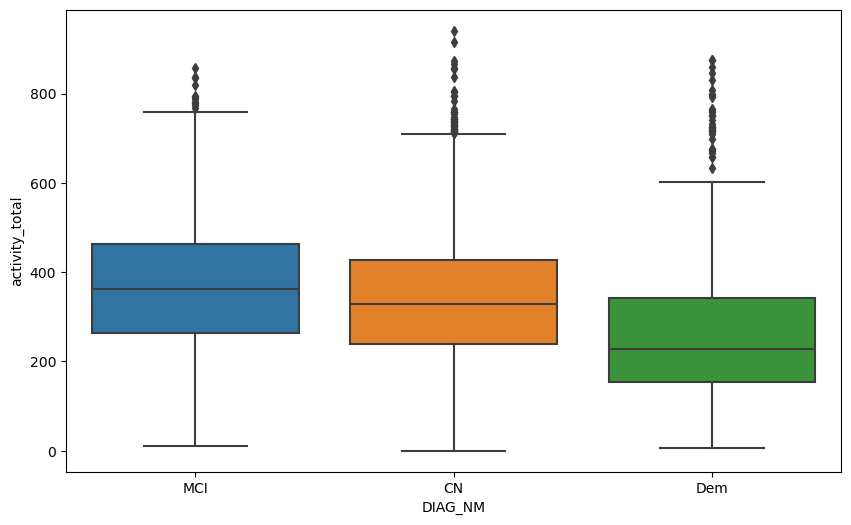

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_activity, x='DIAG_NM', y='activity_total')
plt.show()

In [64]:
import scipy.stats as stats

cn_activity = train_activity[train_activity['DIAG_NM'] == 'CN']['activity_total']
mci_activity = train_activity[train_activity['DIAG_NM'] == 'MCI']['activity_total']
dem_activity = train_activity[train_activity['DIAG_NM'] == 'Dem']['activity_total']

# ANOVA 분석
f_stat, p_value = stats.f_oneway(cn_activity, mci_activity, dem_activity)

# 결과 출력
print(f"ANOVA Test: F-statistic = {f_stat:.2f}, p-value = {p_value:.5f}")

ANOVA Test: F-statistic = 143.51, p-value = 0.00000


p-value가 매우 작아(0.05보다 훨씬 작은 값) 유의수준 0.05 하에서 DIAG_NM 그룹 간의 activity_total 평균 차이가 통계적으로 유의미하다고 결론지을 수 있다

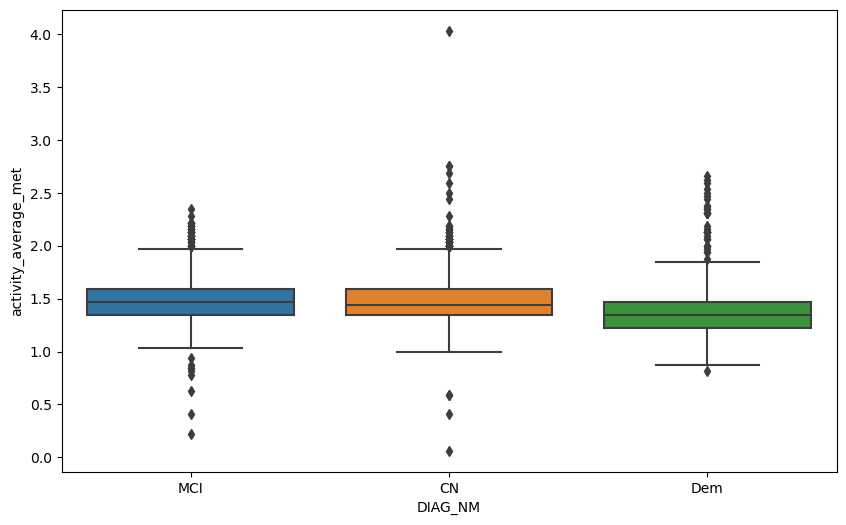

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_activity, x='DIAG_NM', y='activity_average_met')
plt.show()

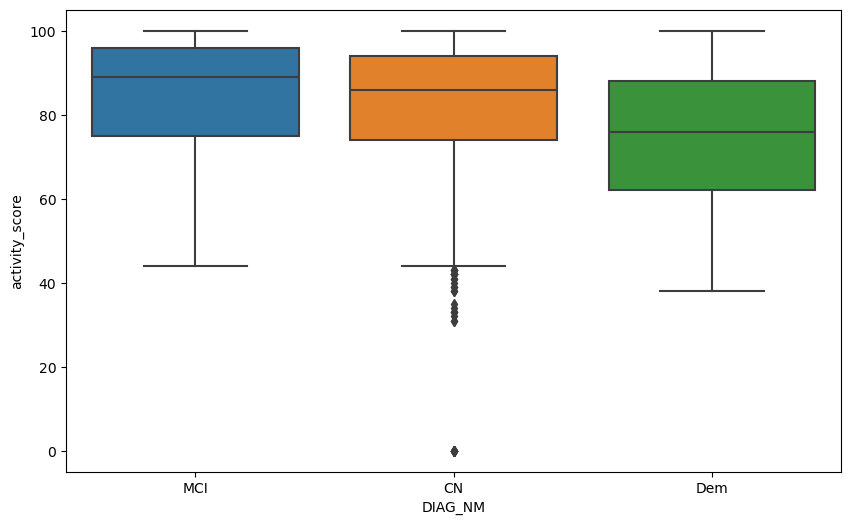

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_activity, x='DIAG_NM', y='activity_score')
plt.show()

In [68]:
# DIAG_NM 상태별로 activity_score 데이터를 나눔
cn_score = train_activity[train_activity['DIAG_NM'] == 'CN']['activity_score']
mci_score = train_activity[train_activity['DIAG_NM'] == 'MCI']['activity_score']
dem_score = train_activity[train_activity['DIAG_NM'] == 'Dem']['activity_score']

# ANOVA 분석
f_stat, p_value = stats.f_oneway(cn_score, mci_score, dem_score)

# 결과 출력
print(f"ANOVA Test: F-statistic = {f_stat:.2f}, p-value = {p_value:.5f}")

ANOVA Test: F-statistic = 138.68, p-value = 0.00000


In [69]:
# 'EMAIL'과 'SAMPLE_EMAIL'을 기준으로 train_sleep에 label을 추가
train_sleep = train_sleep.merge(training_label_activity, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')

# 'SAMPLE_EMAIL' 열이 중복되므로 제거 (필요한 경우)
train_sleep = train_sleep.drop(columns=['SAMPLE_EMAIL'])

In [70]:
train_sleep

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8),DIAG_NM
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...,MCI
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/...,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/...,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/...,MCI
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55...,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/...,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53...,MCI
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51...,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/...,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50...,MCI
4,nia+279@rowan.kr,7170,2020-10-23T02:23:30+09:00,2020-10-22T20:38:30+09:00,17.875,4320,20700,65,...,50.80,...,78,25,29,-0.50,-0.50,13530,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/5...,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/...,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/4...,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,2020-12-24T06:51:37+09:00,2020-12-23T21:35:37+09:00,15.875,1710,33360,82,...,63.75,...,81,95,86,-0.09,-0.09,27360,68/66/67/67/68/69/69/70/71/71/71/69/72/70/70/7...,4/4/2/2/2/1/1/1/1/1/1/2/2/3/3/2/2/2/2/2/3/4/2/...,26/16/19/18/16/18/19/17/15/16/15/13/11/13/13/1...,CN
9701,nia+206@rowan.kr,5700,2020-12-26T06:36:19+09:00,2020-12-25T22:54:19+09:00,16.125,0,27720,79,...,67.40,...,86,89,64,0.41,0.41,22020,0/0/65/65/66/67/69/72/73/72/73/74/73/74/75/75/...,4/4/2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/3/3/3/2/2/4/...,0/0/13/12/12/13/12/12/12/16/13/12/13/17/13/18/...,CN
9702,nia+206@rowan.kr,5070,2020-12-27T07:56:40+09:00,2020-12-26T22:05:40+09:00,15.625,480,35460,86,...,64.84,...,89,98,97,0.27,0.27,30390,0/0/0/64/64/64/64/65/65/66/66/66/66/68/68/68/6...,4/4/4/4/2/2/2/2/2/2/2/2/2/3/3/3/3/2/4/4/2/2/2/...,0/0/0/14/17/18/14/14/17/15/17/12/17/12/13/12/1...,CN
9703,nia+206@rowan.kr,2040,2020-12-28T05:05:45+09:00,2020-12-27T21:21:45+09:00,15.875,2220,27840,93,...,67.05,...,89,86,80,-0.05,-0.05,25800,0/60/60/61/60/60/60/62/64/64/64/64/65/68/70/70...,4/4/1/2/2/2/2/1/2/2/2/1/1/1/3/3/1/1/2/2/3/3/3/...,0/14/15/14/15/16/17/16/16/18/18/20/23/15/21/20...,CN


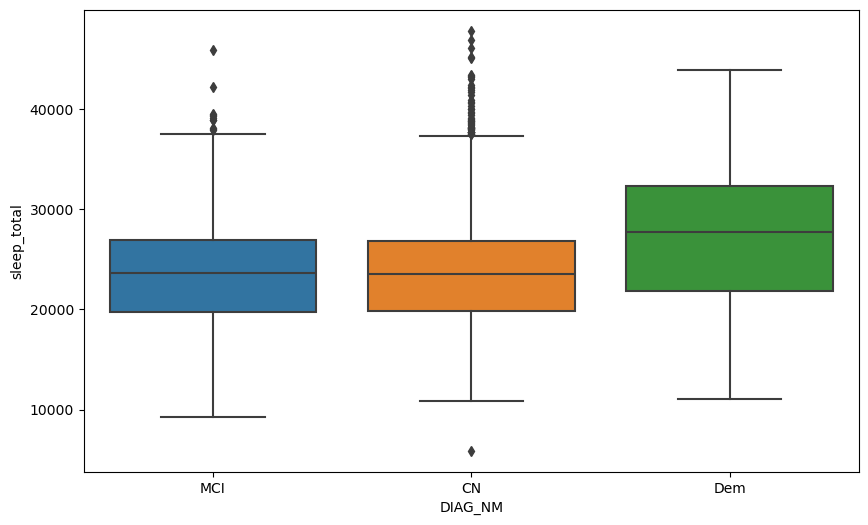

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_total')
plt.show()

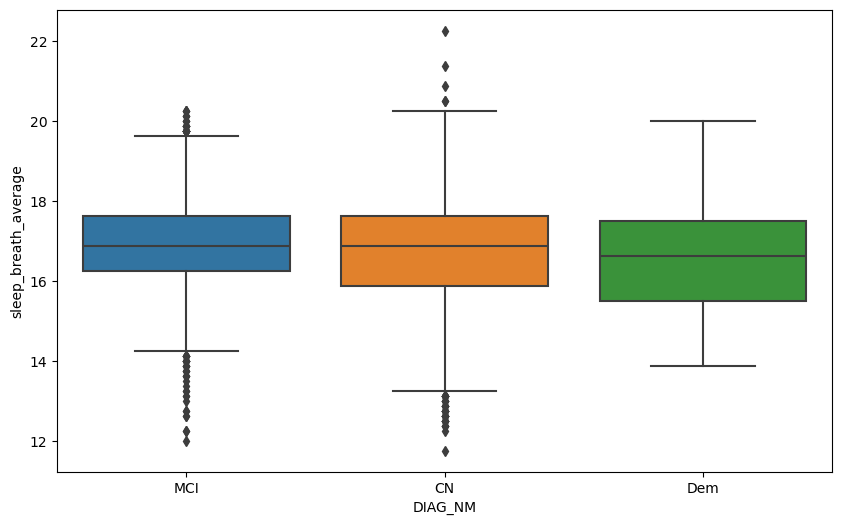

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_breath_average')
plt.show()

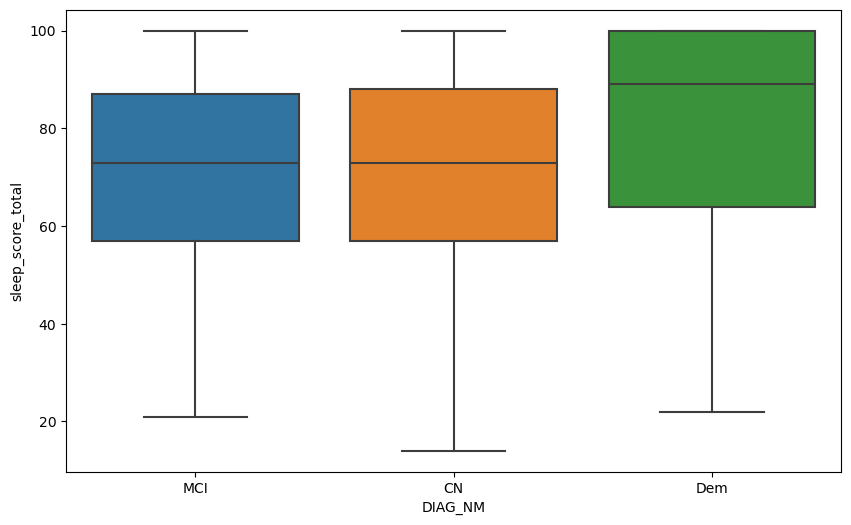

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_score_total')
plt.show()

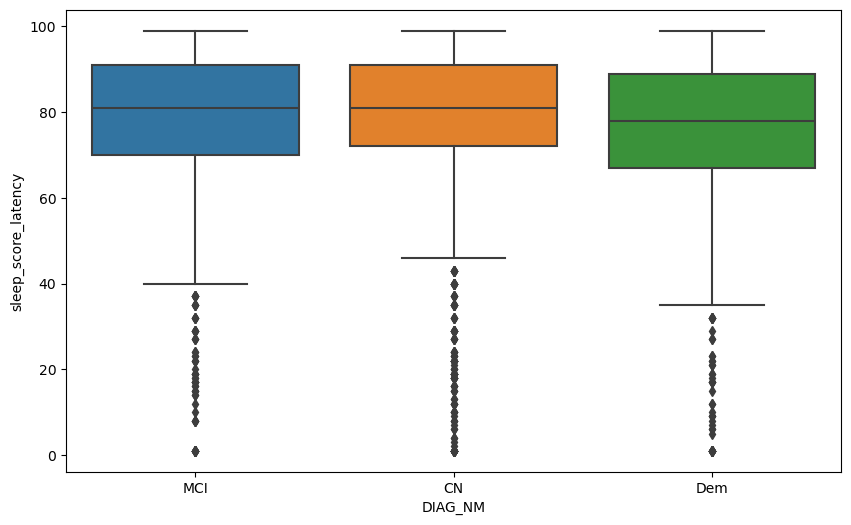

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_score_latency')
plt.show()

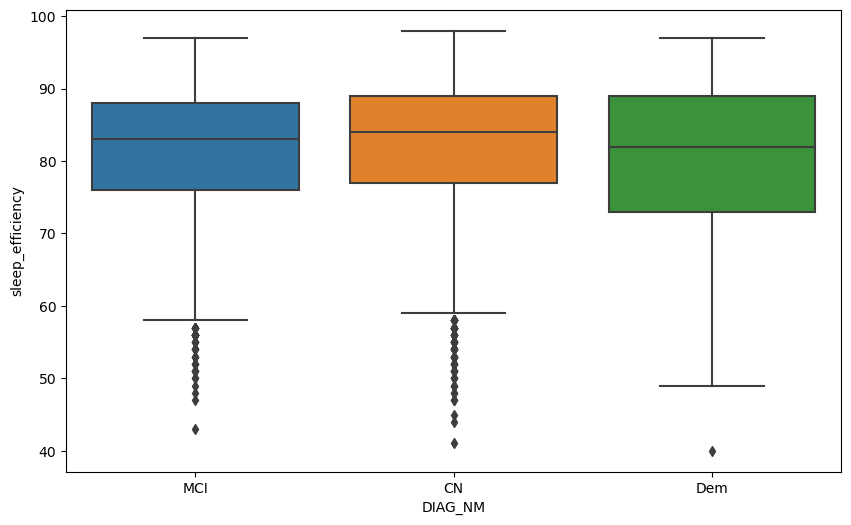

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_efficiency')
plt.show()

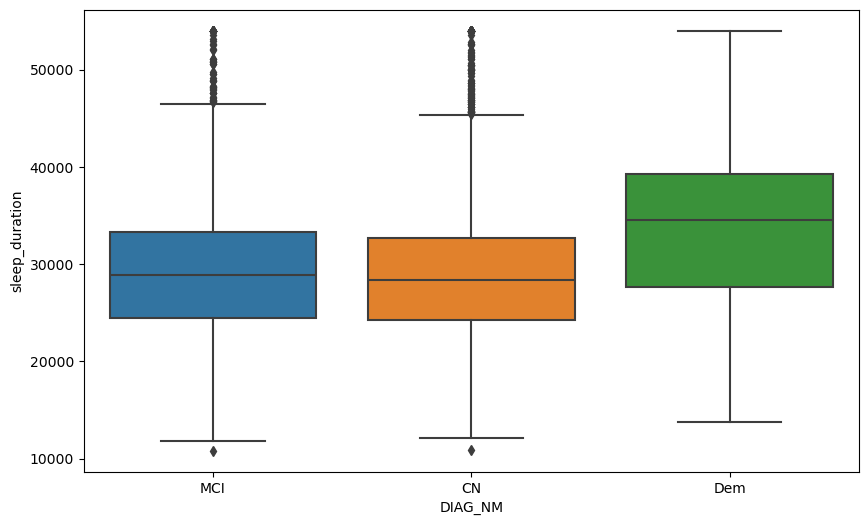

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_duration')
plt.show()

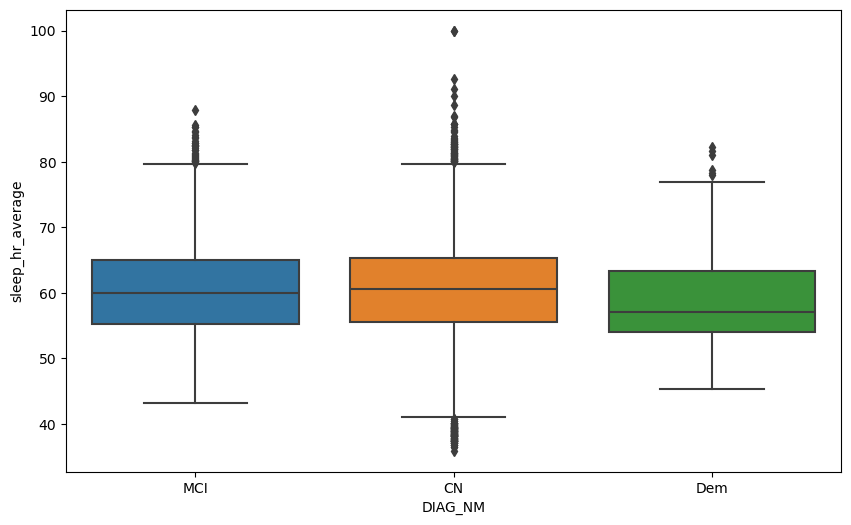

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_hr_average')
plt.show()

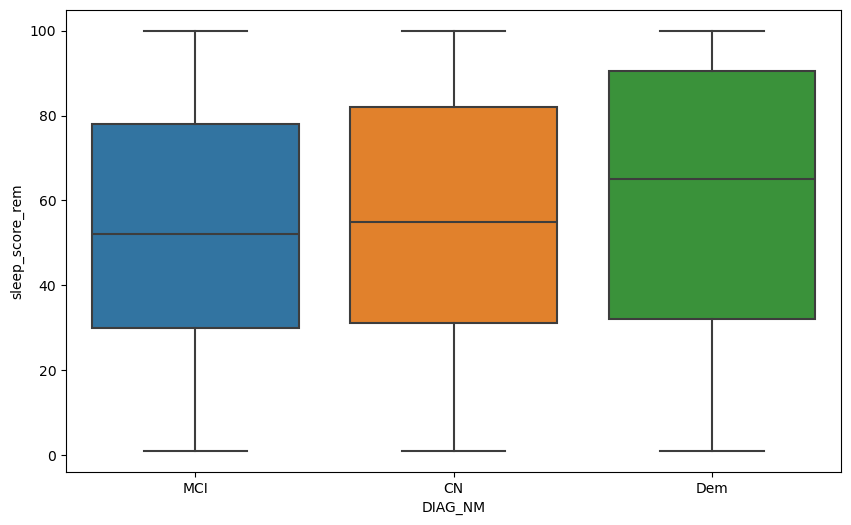

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_score_rem')
plt.show()

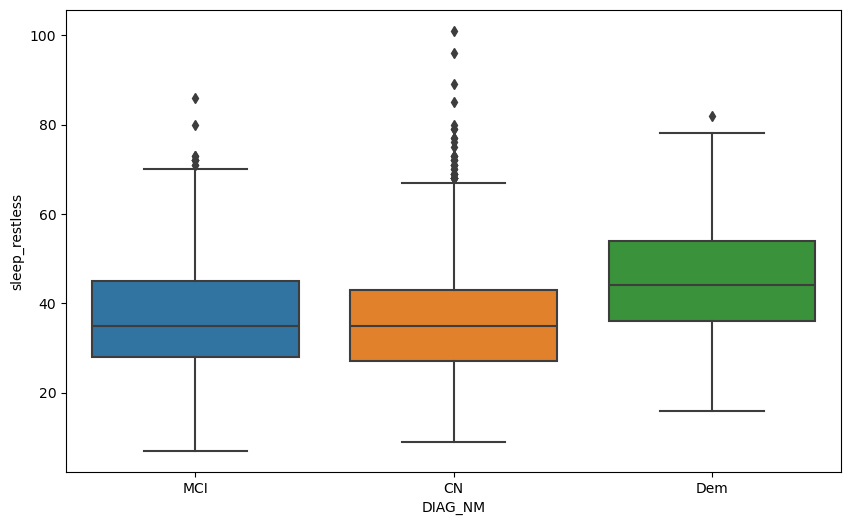

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_restless')
plt.show()

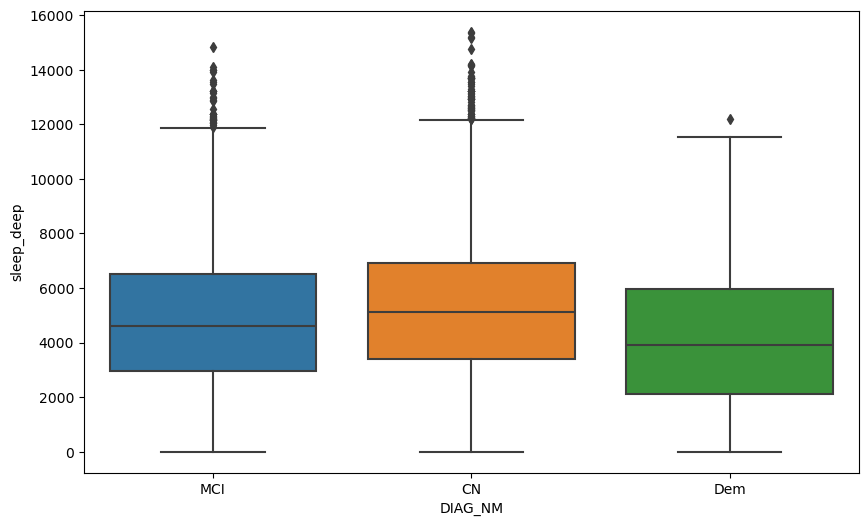

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sleep, x='DIAG_NM', y='sleep_deep')
plt.show()

EMAIL 별로 그룹화한 데이터로 만든게 아니라, 쌩으로 한 것이라 좀더 살펴볼 필요성은 있음